# **Análisis de las jugadas 2**

### Instalar e importar las librerias para el analisis de las partidas

In [6]:
! pip install pandas
! pip install matplotlib

You should consider upgrading via the 'F:\Cosas\Lenguajes y Programacion\Python\python.exe -m pip install --upgrade pip' command.
ERROR: Could not install packages due to an OSError: ("Connection broken: OSError(28, 'No space left on device')", OSError(28, 'No space left on device'))

You should consider upgrading via the 'F:\Cosas\Lenguajes y Programacion\Python\python.exe -m pip install --upgrade pip' command.


In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import time

ModuleNotFoundError: No module named 'matplotlib'

#### Se importa el archivo y se crea el dataFrame

In [ ]:
path_archivo = os.path.join(os.path.realpath('..'), '..', 'registros', 'datos_de_jugadas.csv')
try:
    data_set = pd.read_csv(path_archivo, encoding='utf-8')
except FileNotFoundError:
    print('No se encontró el registro de jugadas')

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        370 non-null    float64
 1   id               370 non-null    object 
 2   evento           370 non-null    object 
 3   nombre_jugador   370 non-null    object 
 4   edad_jugador     370 non-null    int64  
 5   genero_jugador   370 non-null    object 
 6   estado           296 non-null    object 
 7   texto_ingresado  238 non-null    object 
 8   respuesta        283 non-null    object 
 9   nivel            370 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 29.0+ KB


# Estadísticas

### Mejor Tiempo de Respuesta Correcta

* Tomo las filas que me sirven para hacer los cálculos.

In [ ]:
jugadas = data_set[(data_set["evento"] == "intento") | (data_set["evento"] == "inicio_partida")]

* Duplico el dataFrame, uno de sin la primer fila y el otro sin la última. Lugo resto para obtener la duración de la respuesta.

In [ ]:
last = jugadas.index[len(jugadas.index) - 1]
jugadas_resta = jugadas.drop(last).reset_index()
jugadas = jugadas.drop(0).reset_index()

jugadas['timestamp'] = jugadas['timestamp'] - jugadas_resta['timestamp']

* Busco el que tenga menor tiempo y acomodo para mostrar.

In [ ]:
jugadas = jugadas[(jugadas["evento"] == "intento") & (jugadas["estado"] == "ok")]
tiempo_min = jugadas['timestamp'].min()

jugadas = jugadas.rename(columns={'timestamp': 'tiempo'}).drop('index', axis='columns')
jugadas[jugadas['tiempo'] == tiempo_min]

,tiempo,id,evento,nombre_jugador,edad_jugador,genero_jugador,estado,texto_ingresado,respuesta,nivel
142,1.112036,eea14e95-9cbb-4e8d-99b4-86bc8773340b,intento,Trinity,55,Femenino,ok,Adam Hloušek,Adam Hloušek,Personalizado


### Promedio de tiempo de respuestas exitosas

* Tomo las filas que me sirven para hacer los cálculos.

In [ ]:
jugadas = data_set[(data_set["evento"] == "intento") | (data_set["evento"] == "inicio_partida")]

* Duplico el dataFrame, uno de sin la primer fila y el otro sin la última. Lugo resto para obtener la duración de la respuesta.

In [ ]:
last = jugadas.index[len(jugadas.index) - 1]
jugadas_resta = jugadas.drop(last).reset_index()
jugadas = jugadas.drop(0).reset_index()

jugadas['timestamp'] = jugadas['timestamp'] - jugadas_resta['timestamp']

* Filtro el dataFrame por respuesta correcta y obtengo el promedio de tiempo. Luego adapto para mostrar.

In [ ]:
jugadas = jugadas[jugadas["estado"] == "ok"]
tiempo = jugadas['timestamp'].sum() / len(jugadas)

jugadas = jugadas.loc[ :0, ['timestamp']].rename(columns={'timestamp': 'promedio de tiempo'})
jugadas['promedio de tiempo'] = tiempo
jugadas

,promedio de tiempo
0,5.070452


### Promedio de tiempo de partida

* Tomo las filas que me sirven. 

In [ ]:
partida = data_set[data_set["evento"] == "inicio_partida"].reset_index()
fin = data_set[data_set["evento"] == "fin"].reset_index()

columnas = data_set[['id', 'timestamp', 'evento']]
partida = columnas[columnas['evento'].isin(['inicio_partida'])]
fin = columnas[columnas['evento'].isin(['fin'])]

partida = partida.rename(columns={'timestamp': 'tiempo_inicio'})
fin = fin.rename(columns={'timestamp': 'tiempo_fin'})


* Hago un merge de las partidas por id y obtengo el promedio del tiempo de partida.

In [ ]:
partida = pd.merge(partida, fin[['id', 'tiempo_fin']], how='right')

partida['duracion'] = partida['tiempo_fin'] - partida['tiempo_inicio']
tiempo = partida['duracion'].sum() / len(partida)

* Acomodo para presentar el resultado.

In [ ]:
partida = partida.loc[ :0, ['duracion']].rename(columns={'duracion': 'promedio de tiempo'})
partida['promedio de tiempo'] = tiempo
partida

,promedio de tiempo
0,30.729038


### Porcentaje de aciertos por usuario

* Filtro el dataFrame por las filas que necesito y obtengo cuantas veces aparece el mismo usuario.

In [ ]:
jugadas = data_set[data_set["evento"] == "intento"]
jugadores = jugadas["nombre_jugador"].value_counts()

* Genero el dataFrame para los resultados.

In [ ]:
res = pd.DataFrame({'jugador' : [], 'aciertos': [], 'errores': [], 'porcentaje de aciertos' : []})

* Para cada usuario guardo en los resultados la cantidad de aciertos y errores, además del porcentaje de acierto.

In [ ]:
for x in jugadores.keys():
    jugador = jugadas[jugadas['nombre_jugador'] == x]['estado'].value_counts()
    if 'ok' in jugador:
        aciertos = jugador['ok']
    else:
        aciertos = 0
    if 'error' in jugador:
        errores = jugador['error']
    fila = pd.DataFrame({'jugador' : [x], 'aciertos': [aciertos], 'errores': errores, 
            'porcentaje de aciertos' : [f'{int(aciertos / jugadores[x] * 100)}%']})
    res = pd.concat([res, fila], ignore_index=True)
res = res.astype({'aciertos': 'int64', 'errores': 'int64'})

res

,jugador,aciertos,errores,porcentaje de aciertos
0,Fuwa,16,38,29%
1,NEO,10,41,19%
2,Trinity,9,36,20%
3,Yoda,9,24,27%
4,Yayo,10,21,32%
5,El Jose,2,7,22%
6,Amelia,0,9,0%
7,kaggel,1,5,16%


### Cantidad de tarjetas para las que el usuarie no dió respuesta (timeout).

* Obtengo la cantidad de veces que un jugador no respondió y el total de jugadores.

In [ ]:
jugadas = data_set[data_set["evento"] == "timeout"]["nombre_jugador"].value_counts()
jugadores = data_set["nombre_jugador"].value_counts().keys()

* Adapto el dataFrame para mostrar.

In [ ]:
jugadas = pd.DataFrame(jugadas).reset_index()
jugadas.columns = ['jugador', 'Cantidad de tarjetas sin responder']
jugadas

,jugador,Cantidad de tarjetas sin responder
0,Yayo,5
1,NEO,3
2,Trinity,2
3,kaggel,2
4,Fuwa,2
5,Amelia,1


### Cantidad de tarjetas en las que el usuarie dió una respuesta errónea.

* Obtengo la cantidad de veces que un jugador respondió mal y el total de jugadores.

In [ ]:
jugadas = data_set[(data_set["evento"] == "intento") & (data_set["estado"] == "error")]["nombre_jugador"].value_counts()
jugadores = data_set["nombre_jugador"].value_counts().keys()

* Adapto el dataFrame para mostrar.

In [ ]:
jugadas = pd.DataFrame(jugadas).reset_index()
jugadas.columns = ['jugador', 'Cantidad de respuestas erroneas']
jugadas

,jugador,Cantidad de respuestas erroneas
0,NEO,41
1,Fuwa,38
2,Trinity,36
3,Yoda,24
4,Yayo,21
5,Amelia,9
6,El Jose,7
7,kaggel,5


###  Gráfico que muestre el porcentaje de partidas que se juegan para cada día de la semana.

* Para obtener un registro por día elimino duplicados según la columna que identifica cada jugada. De cada fila del DataFrame me quedo con la columna de marca temporal, le aplico una función para obtener la descripción de ese tiempo y me quedo con las primeras posiciones del str que identifican el día de la semana.

In [ ]:
calculo_por_dia = data_set.drop_duplicates('id')
calculo_por_dia = calculo_por_dia.timestamp.apply(lambda x: time.ctime(x)).str[:3]
calculo_por_dia.head(10)

0     Thu
11    Thu
23    Thu
29    Fri
31    Sat
39    Sat
46    Sat
58    Sat
65    Sat
72    Sat
Name: timestamp, dtype: object

* Aplico una función para obtener el nombre del día en castellano a partir del diccionario _traduccion_. Cuento las apariciones de cada día y paso esos valores a porcentajes

In [ ]:
traduccion = {'Mon': 'Lunes', 'Tue': 'Martes', 'Wed': 'Miércoles', 'Thu': 'Jueves', 'Fri': 'Viernes', 'Sat': 'Sábado', 'Sun': 'Domingo'}
calculo_por_dia = calculo_por_dia.apply(lambda x: traduccion[x])
calculo_por_dia = calculo_por_dia.value_counts()
calculo_por_dia = calculo_por_dia / calculo_por_dia.sum() *100
calculo_por_dia

Sábado       25.000000
Viernes      22.727273
Jueves       18.181818
Martes       13.636364
Miércoles    13.636364
Lunes         4.545455
Domingo       2.272727
Name: timestamp, dtype: float64

* Utilizando Matplotlib configuro el gráfico para mostrar los datos obtenidos

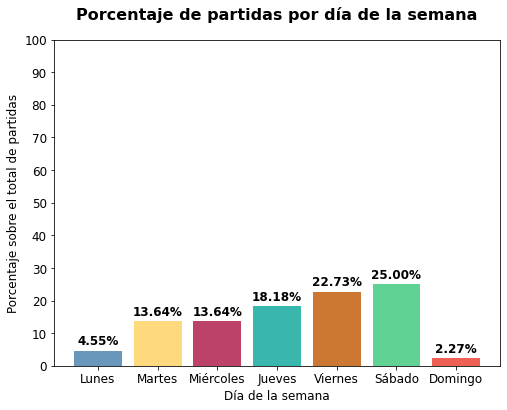

In [ ]:
valores = [calculo_por_dia[list(traduccion.values())[i]] for i in range(7)]
colores = ["#6897BB", "#FFD97D", "#BD4267", "#39B7AC", "#CC7832", "#60D394", "#EE6055"]
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})
plt.bar(traduccion.values(), valores, color=colores)
plt.title('Porcentaje de partidas por día de la semana', fontdict=dict(fontsize=16, fontweight='bold'), pad=20, color='Black')
plt.ylabel('Porcentaje sobre el total de partidas')
plt.xlabel('Día de la semana')
plt.yticks([num for num in range(0, 101, 10)])
for indice, valor in enumerate(valores):
    plt.text(indice, valor+3, f'{valor.round(2):.2f}%', ha='center', fontdict=dict(fontsize=12, fontweight='bold'), va='center')
plt.show()